In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()
test.head()
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info() ## type and null
train.describe() ## statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isnull().sum().sort_values(ascending=False)

## Cabin has many null values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

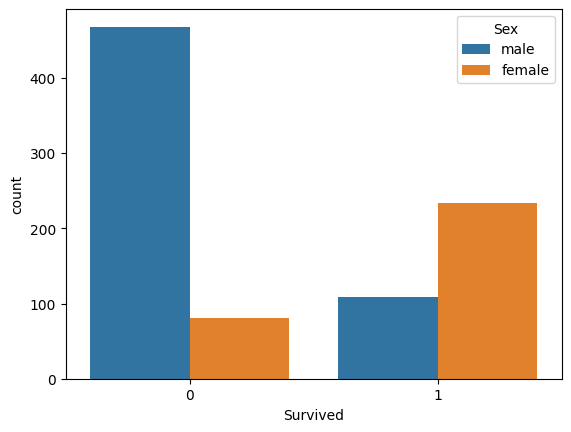

In [ ]:
sns.countplot(data=train, x = 'Survived', hue ='Sex')
## the survival rate of female is greater than male

<Axes: xlabel='Survived', ylabel='Age'>

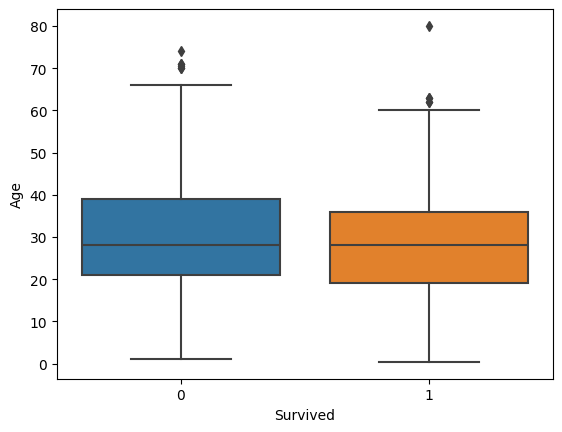

In [ ]:
sns.boxplot(data=train, x = 'Survived' ,y = 'Age')
## young adults have a higher survival rate

<Axes: xlabel='Survived', ylabel='count'>

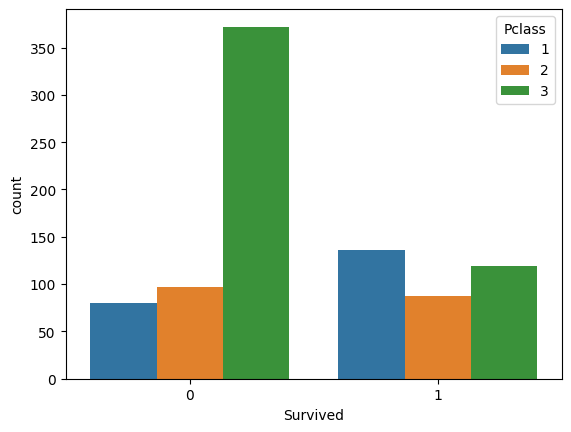

In [ ]:
sns.countplot(data=train, x = 'Survived', hue = 'Pclass')
## class 1 has the highest survival rate, and class 3 has the lowest

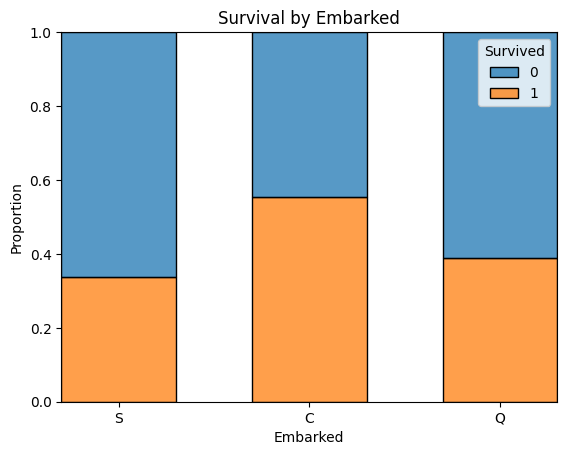

In [ ]:
sns.histplot(
    data=train,
    x="Embarked",
    hue="Survived",
    multiple="fill", ## stack proportion
    shrink=0.6, ## shrink the bar width
    discrete=True, 
    stat="probability"
)

plt.ylabel("Proportion")
plt.title("Survival by Embarked")
plt.show()

## embark C has the highest survival rate

In [ ]:
## data preprocessing
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
# train = train.drop(columns=drop_cols)

## missing values
train['Age'] = train['Age'].fillna(train["Age"].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

test['Age'] = test['Age'].fillna(test["Age"].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
## Since this is a binary question, use label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])

test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked']=le.fit_transform(test['Embarked'])

In [ ]:
## Feature engineering
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
print(train['Title'].value_counts())


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


In [ ]:
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = LabelEncoder().fit_transform(train['Title'])

test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = LabelEncoder().fit_transform(test['Title'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train['Age_scaled'] = scaler.fit_transform(train[['Age']])
train['Fare_scaled'] = scaler.fit_transform(train[['Fare']])

test['Age_scaled'] = scaler.fit_transform(test[['Age']])
test['Fare_scaled'] = scaler.fit_transform(test[['Fare']])


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = train.drop(columns = drop_cols + ['Survived'], axis = 1)
y = train['Survived']

X = pd.get_dummies(X) ## change to one-hot encoding

model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5)
## cv=5 folds
print("Cross validation Accuracy:", scores.mean())

Cross validation Accuracy: 0.8181909484652564


In [44]:
model.fit(X, y)

test_processed = pd.get_dummies(test)
test_processed = test_processed.reindex(columns=X.columns, fill_value=0)

predictions = model.predict(test_processed)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)
